In [1]:
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def readJSON(path):
    f = gzip.open(path, 'rt')
    f.readline()
    for l in f:
        try:
            d = eval(l)
            yield d
        except:
            continue

In [3]:
dataset = []
for l in readJSON('renttherunway_final_data.json.gz'):
    dataset.append(l)
clothing = pd.DataFrame(dataset)

In [4]:
clothing.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
1,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
2,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
3,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"
4,fit,734848,32b,364092,138lbs,8,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,"5' 8""",8,45,"April 30, 2016"


In [5]:
clothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192461 entries, 0 to 192460
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fit             192461 non-null  object
 1   user_id         192461 non-null  object
 2   bust size       174064 non-null  object
 3   item_id         192461 non-null  object
 4   weight          162504 non-null  object
 5   rating          192461 non-null  object
 6   rented for      192451 non-null  object
 7   review_text     192461 non-null  object
 8   body type       177824 non-null  object
 9   review_summary  192461 non-null  object
 10  category        192461 non-null  object
 11  height          191784 non-null  object
 12  size            192461 non-null  int64 
 13  age             191502 non-null  object
 14  review_date     192461 non-null  object
dtypes: int64(1), object(14)
memory usage: 22.0+ MB


## Cleaning for Future Use

In [6]:
clothing['rating'] = pd.to_numeric(clothing['rating'])
clothing['size'] = pd.to_numeric(clothing['size'])
clothing['age'] = pd.to_numeric(clothing['age'])
clothing['review_date'] = pd.to_datetime(clothing['review_date'])

In [7]:
clothing.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,2013-06-18
1,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,2015-12-14
2,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,2014-02-12
3,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,2016-09-26
4,fit,734848,32b,364092,138lbs,8,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,"5' 8""",8,45.0,2016-04-30


In [8]:
clothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192461 entries, 0 to 192460
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fit             192461 non-null  object        
 1   user_id         192461 non-null  object        
 2   bust size       174064 non-null  object        
 3   item_id         192461 non-null  object        
 4   weight          162504 non-null  object        
 5   rating          192461 non-null  int64         
 6   rented for      192451 non-null  object        
 7   review_text     192461 non-null  object        
 8   body type       177824 non-null  object        
 9   review_summary  192461 non-null  object        
 10  category        192461 non-null  object        
 11  height          191784 non-null  object        
 12  size            192461 non-null  int64         
 13  age             191502 non-null  float64       
 14  review_date     192461 non-null  dat

## Simple EDA

#### Number Entries

In [9]:
clothing.shape[0]

192461

#### Number Users

In [10]:
pd.unique(clothing['user_id']).shape[0]

105508

#### Number Items

In [11]:
pd.unique(clothing['item_id']).shape[0]

5850

#### Distribution of Ratings

In [12]:
rating_count = clothing['rating'].value_counts().to_frame().reset_index()

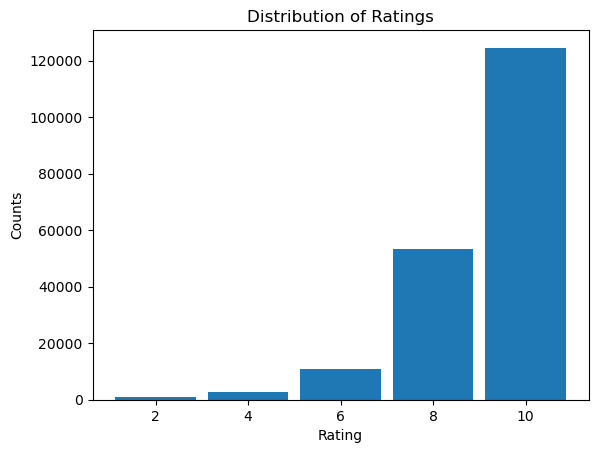

In [13]:
plt.bar(x='index', height='rating', data=rating_count, width=1.75);
plt.xlabel('Rating');
plt.ylabel('Counts');
plt.title('Distribution of Ratings');

#### Time Period

In [14]:
clothing['review_date'].max()

Timestamp('2018-01-08 00:00:00')

In [15]:
clothing['review_date'].min()

Timestamp('2010-11-03 00:00:00')

In [16]:
clothing['review_date'].max() - clothing['review_date'].min()

Timedelta('2623 days 00:00:00')

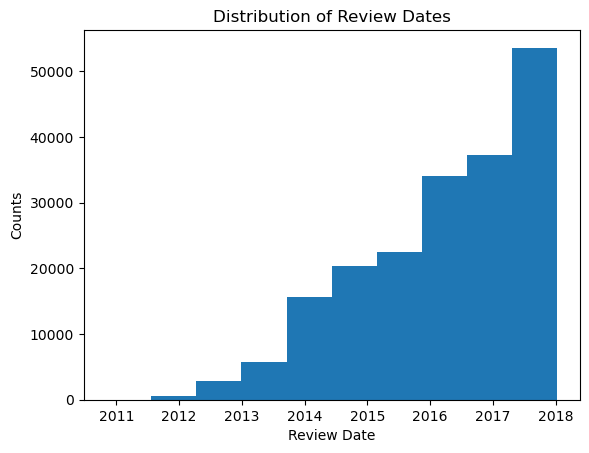

In [17]:
plt.hist(data=clothing, x='review_date');
plt.xlabel('Review Date');
plt.ylabel('Counts');
plt.title('Distribution of Review Dates');

## Extra EDA

#### Top Categories

In [18]:
cat_count = clothing['category'].value_counts().to_frame().reset_index()[:5]

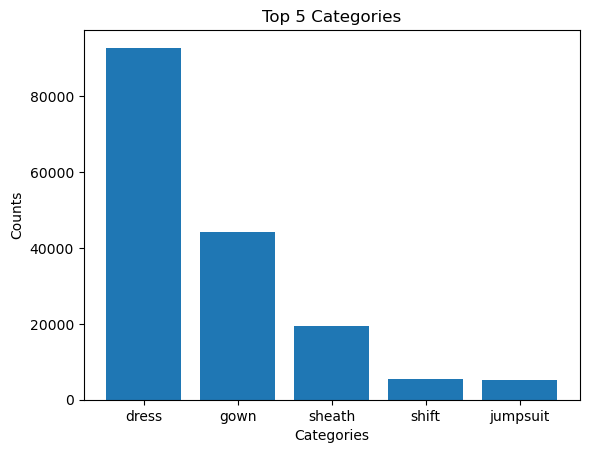

In [19]:
plt.bar(x='index', height='category', data=cat_count);
plt.xlabel('Categories');
plt.ylabel('Counts');
plt.title('Top 5 Categories');

#### Correlation Between Ratings and Categories?

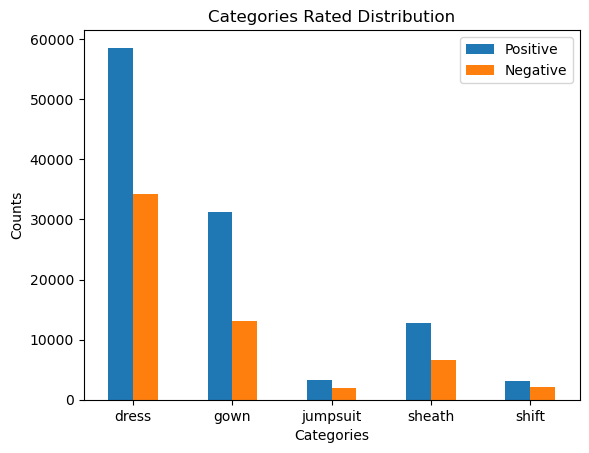

In [20]:
cats = ['dress', 'gown', 'sheath', 'shift', 'jumpsuit']
pos = clothing[(clothing['rating'] == 10) & (clothing['category'].isin(cats))].groupby('category')[['rating']].count().rename(columns={'rating': 'Positive'})
neg = clothing[(clothing['rating'] <= 8) & (clothing['category'].isin(cats))].groupby('category')[['rating']].count().rename(columns={'rating': 'Negative'})
merged = pos.merge(neg, left_index=True, right_index=True)
merged.plot.bar();
plt.xticks(rotation = 0);
plt.xlabel('Categories');
plt.ylabel('Counts');
plt.title('Categories Rated Distribution');

Our dataset is from Rent the Runway, a clothing brand in which people are able to rent clothes from for any ocassion. The dataset contains 192,461 unique entries, which include 105,508 unique users and 5,850 unique items. It contains 15 columns as described below after basic cleaning:

- fit (str): Clothing fit for item
- user_id (int): Unique user_id that left review for a clothing item
- bust size (str): Bust size of user
- item_id (int): Unique item_id for the item being reviewed
- weight (int): Weight of user in pounds
- rating (int): Rating left by the user, with 1 being the lowest rating possible and 10 being highest rating possible
- rented for (str): Ocassion item was rented for
- review_text (str): Review left by user for item
- body type (str): Body type of user
- review_summary (str): Summarized and shortened version of review_text
- category (str): type of clothing style for the particular item
- height (int): Height of user in inches
- size (int): Size of item
- age (int): Age of user
- review_date (datetime): Timestamp of when review was published

Taking a look at review_date, most of the data is more towards the recent end, as the graph is negatively-skewed:

(SHOW GRAPH)

While not an important factor, it suggests that there might be a bias due to fashion style and trends during this time period. The oldest review date was left on November 3, 2010, in contrast to the most recent review being left on January 8, 2018. This timespan covers 2623 days, or roughly ~7.186 years.

With one of our models predicting the rating a user will give an item, we decided to look at the distribution of the ratings:

(SHOW GRAPH)

To our surprise, this distribution is also negatively-skewed, with more people opting to give items a rating of 10. This somewhat makes sense as people only tend to leave reviews for items that they either strongly like or strongly dislike. With this theory, however, there are hardly any negative ratings, suggesting that most people tend to only leave positive reviews.

Another trend we decided to look at is categories and how they might affect rating. Firstly, we plotted the distribution of the top 5 categories of items:

(SHOW GRAPH)

These categories turned out to be dress, gown, sheath, shift, and jumpsuit. The gap from the most popular category to the second-most popular category is quite large, as there is also dropoff in each subsequent category. Using this, we decided to see how ratings were for each category. In this instance, a positive rating is a 10 and anything below 10 is considered a negative rating:

(SHOW GRAPH)

While it was assumed that there would be more positive than negative ratings based on the previously shown distribution, the gap is still large, particularly for the dress, gown, and sheath categories respectively. While it could suggest that Rent the Runway is a reputable site to rent clothes from, it could also be that the company is deleting negative reviews so that new customers are intrigued rather than losing interest and moving to a different site.